### Exploring the Restaurant scenario in the Neighborhood of Jaipur

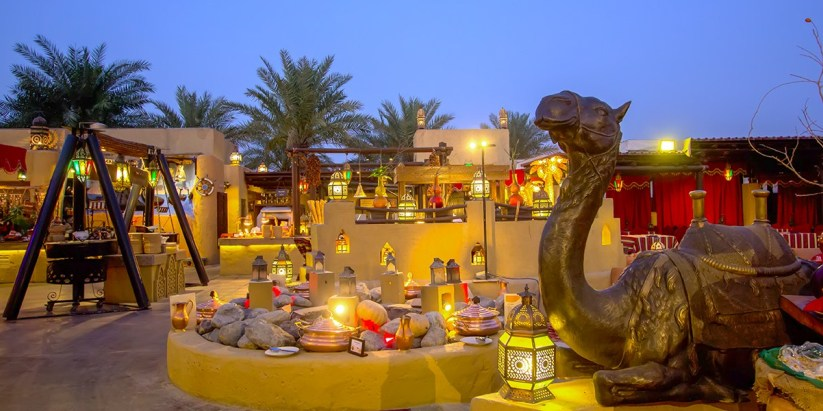

### Applied Data Science capstone project for IBM/Coursera

* [Table of Contents](#Table_of_Contents)
* [Introduction](#Introduction)
* [Data Collection from APIs](#Data_Collection_from_APIs)
* [Data Cleaning](#Data_Cleaning)
* [Methodology](#Methodology)
* [Analysis](#Analysis)
* [Results and Discussion](#Results_and_Discussion)
* [Conclusion](#Conclusion)

### Introduction 

Jaipur is the capital and the largest city of the Indian state of Rajasthan. As of 2011, the city had a population of 3.1 million, making it the tenth most populous city in the country. Jaipur is also known as the Pink City, due to the dominant colour scheme of its buildings.] It is located 268 km (167 miles) from the national capital New Delhi.
Jaipur is a popular tourist destination in India and forms a part of the west Golden Triangle tourist circuit along with Delhi and Agra (240 km, 149 mi). It also serves as a gateway to other tourist destinations in Rajasthan such as Jodhpur (348 km, 216 mi), Jaisalmer (571 km, 355 mi), Udaipur (421 km, 262 mi), Kota (252 km, 156 mi) and Mount Abu (520 km, 323 mi). Jaipur is located 616 km from Shimla.

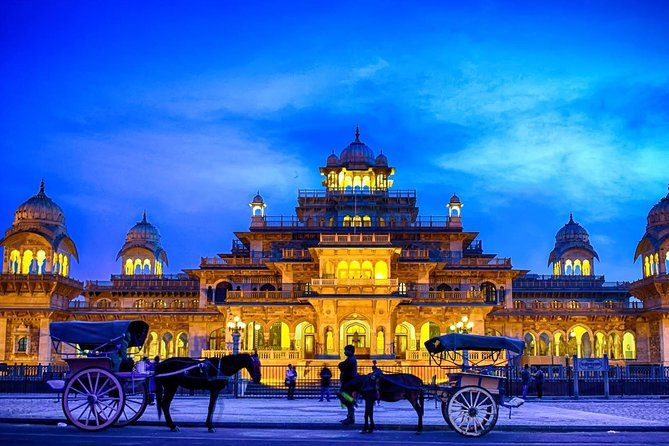

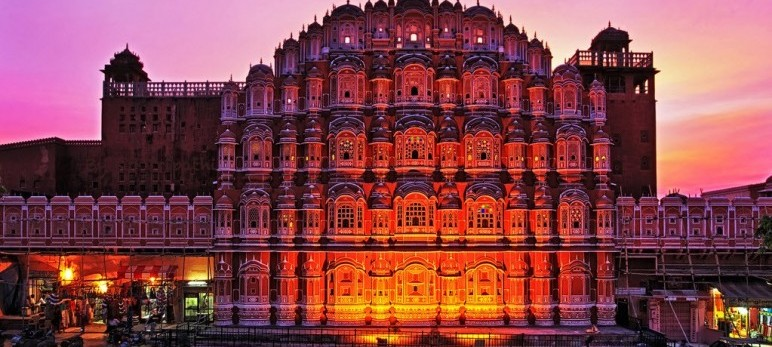

The aim of the project is to identify venues in Jaipur, India based on their rating and average prices. In this notebook, we will identify various venues in the city of Jaipur, India, using Foursquare API and Zomato API, to help visitors select the restaurants that suit them the best.

Whenever a user is visiting a city they start looking for places to visit during their stay. They primarily look for places based on the venue ratings across all venues and the average prices such that the locations fits in their budget.

Here, we'll identify places that are fit for various individuals based on the information collected from the two APIs and Data Science. Once we have the plot with the venues, any company can launch an application using the same data and suggest users such information.


### Target Audience 

The target audience for such a project is twofold. Firstly, any person who is visiting Jaipur, The Pink City of Rajasthan. 

India can use the plots and maps from this project to quickly select places that suit their budget and rating preferences. Secondly, an entrepreneur who want to open new restaurants in Jaipur   can use this information to create a website or a mobile application, which is updated on a regular basis, to allow individuals to the city or even expand same functionality to other places.
We will use the data science tools and techniques to understand or weigh in the pros and cons of a location. We provide an analysis for the stakeholders to take a data driven decision to choose the best category/location/price range in the city about most promising and viable option.

Jaipur is the capital and the largest city of the Indian state of Rajasthan. As of 2011, the city had a population of 3.1 million, making it the tenth most populous city in the country. Jaipur is also known as the Pink City, due to the dominant colour scheme of its buildings.] It is located 268 km (167 miles) from the national capital New Delhi.


In [1]:
import pandas as pd 
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from pandas.io.json import json_normalize

!pip install geopy
from geopy.geocoders import Nominatim

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans
!pip install folium
import folium
from geopy.geocoders import Nominatim

print('libraries imported')

     |████████████████████████████████| 122kB 3.3MB/s eta 0:00:01
libraries imported


In [2]:
address='Jaipur'
geolocator=Nominatim(user_agent='japur_explorer')

In [3]:
location=geolocator.geocode(address,timeout=None)
print(location)
latitude=location.latitude
longitude=location.longitude
print('{} is latitude. {} is longitude'.format(latitude,longitude))

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `timeout=None` has been passed to a geocoder call. Using default geocoder timeout. In geopy 2.0 the behavior will be different: None will mean "no timeout" instead of "default geocoder timeout". Pass geopy.geocoders.base.DEFAULT_SENTINEL instead of None to get rid of this warning.
  """Entry point for launching an IPython kernel.


Jaipur, Jaipur Tehsil, Jaipur, Rajasthan, 302001, India
26.916194 is latitude. 75.820349 is longitude


In [4]:
CLIENT_ID = 'RQ5VU21QNUA5ANUCLIGEMSXGHJ43XSGUP3PCXHB4H5KIB1NF' # your Foursquare ID
CLIENT_SECRET = 'SAAMYVHGNGQCTB3QWYDPSLMVJJD1FSIGYYJSMTLUR2EEQK1W' # your Foursquare Secret
VERSION = '20100602'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RQ5VU21QNUA5ANUCLIGEMSXGHJ43XSGUP3PCXHB4H5KIB1NF
CLIENT_SECRET:SAAMYVHGNGQCTB3QWYDPSLMVJJD1FSIGYYJSMTLUR2EEQK1W


In [5]:
radius=20000
LIMIT=150

### From Foursquare API (https://api.foursquare.com/v2/venues/) , retrieved the following for each venue:

* Name: The name of the venue.
* Category: The category type as defined by the API.
* Latitude: The latitude value of the venue.
* Longitude: The longitude value of the venue.

In [6]:
fsq_url='https://api.foursquare.com/v2/venues/explore?&client_id=RQ5VU21QNUA5ANUCLIGEMSXGHJ43XSGUP3PCXHB4H5KIB1NF&client_secret=SAAMYVHGNGQCTB3QWYDPSLMVJJD1FSIGYYJSMTLUR2EEQK1W&v=20200602&ll=26.916194,75.820349'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude,
    longitude, 
    radius, 
    LIMIT)

In [7]:
fsq_request=requests.get(fsq_url).json()

In [8]:
fsq_venues=json_normalize(fsq_request['response']['groups'][0]['items'])
fsq_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


referralId  reasons.count  \
0  e-0-50cde2b4e4b0881a7ce5c480-0              0   
1  e-0-4c7940de20bb199cd3ee0d29-1              0   
2  e-0-4bc7875893bdeee12e7c37ae-2              0   
3  e-0-54fc3d16498edf0d9bf04cce-3              0   
4  e-0-4bb594102f70c9b668628430-4              0   

                                       reasons.items  \
0  [{'summary': 'This spot is popular', 'type': '...   
1  [{'summary': 'This spot is popular', 'type': '...   
2  [{'summary': 'This spot is popular', 'type': '...   
3  [{'summary': 'This spot is popular', 'type': '...   
4  [{'summary': 'This spot is popular', 'type': '...   

                   venue.id                    venue.name  venue.location.lat  \
0  50cde2b4e4b0881a7ce5c480  Tapri - The Tea House & Jizo           26.905663   
1  4c7940de20bb199cd3ee0d29            Raj Mandir Theatre           26.915537   
2  4bc7875893bdeee12e7c37ae          Rambagh Palace Hotel           26.897931   
3  54fc3d16498edf0d9bf04cce              Moustache Hostel           26.919589   
4  4bb594102f70c9b668628430                 Jantar Mantar           26.924867   

   venue.location.lng                      venue.location.labeledLatLngs  \
0           75.811182  [{'label': 'display', 'lat': 26.90566346213392...   
1           75.809862  [{'label': 'display', 'lat': 26.91553657647599...   
2           75.808390  [{'label': 'display', 'lat': 26.89793120613395...   
3           75.797884  [{'label': 'display', 'lat': 26.91958916498067...   
4           75.824342  [{'label': 'display', 'lat': 26.92486697724884...   

   venue.location.distance venue.location.cc  ... venue.location.state  \
0                     1483                IN  ...            Rājasthān   
1                     1043                IN  ...            Rājasthān   
2                     2354                IN  ...            Rājasthān   
3                     2261                IN  ...            Rājasthān   
4                     1043                IN  ...            Rājasthān   

  venue.location.country                    venue.location.formattedAddress  \
0                  India                         [Jaipur, Rājasthān, India]   
1                  India     [Panch Batti Circle, Jaipur, Rājasthān, India]   
2                  India     [Bhawani Singh Road, Jaipur, Rājasthān, India]   
3                  India  [7, Park House Scheme near Ganpati Plaza (MI R...   
4                  India  [Near City Palace (Tulsi Marg), Jaipur 302002,...   

                                    venue.categories venue.photos.count  \
0  [{'id': '4bf58dd8d48988d1dc931735', 'name': 'T...                  0   
1  [{'id': '4bf58dd8d48988d17e941735', 'name': 'I...                  0   
2  [{'id': '4bf58dd8d48988d1fa931735', 'name': 'H...                  0   
3  [{'id': '4bf58dd8d48988d1ee931735', 'name': 'H...                  0   
4  [{'id': '4deefb944765f83613cdba6e', 'name': 'H...                  0   

   venue.photos.groups                   venue.location.address  \
0                   []                                      NaN   
1                   []                       Panch Batti Circle   
2                   []                       Bhawani Singh Road   
3                   []  7, Park House Scheme near Ganpati Plaza   
4                   []                         Near City Palace   

  venue.location.crossStreet venue.location.postalCode  \
0                        NaN                       NaN   
1                        NaN                       NaN   
2                        NaN                       NaN   
3       MI Road, Sindhi Camp                    302001   
4                 Tulsi Marg                    302002   

  venue.location.neighborhood  
0                         NaN  
1                         NaN  
2                         NaN  
3                         NaN  
4                         NaN  

[5 rows x 21 columns]

In [9]:
def get_cat_type(row):
    categories_list = row['venue.categories']
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [10]:
column_names=['venue.id','venue.location.lat', 'venue.location.lng','venue.name','venue.categories']
fsq_ven_df=fsq_venues[column_names]
fsq_ven_df['venue.categories']=fsq_ven_df.apply(get_cat_type,axis=1)
fsq_ven_df.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


venue.id  venue.location.lat  venue.location.lng  \
0  50cde2b4e4b0881a7ce5c480           26.905663           75.811182   
1  4c7940de20bb199cd3ee0d29           26.915537           75.809862   
2  4bc7875893bdeee12e7c37ae           26.897931           75.808390   
3  54fc3d16498edf0d9bf04cce           26.919589           75.797884   
4  4bb594102f70c9b668628430           26.924867           75.824342   

                     venue.name     venue.categories  
0  Tapri - The Tea House & Jizo             Tea Room  
1            Raj Mandir Theatre  Indie Movie Theater  
2          Rambagh Palace Hotel                Hotel  
3              Moustache Hostel               Hostel  
4                 Jantar Mantar        Historic Site

In [11]:
jaipur_map=folium.Map(location=[latitude,longitude],zoom_start=14)
jaipur_map

In [12]:
for lat,long,name in zip(fsq_ven_df['venue.location.lat'],fsq_ven_df['venue.location.lng'],fsq_ven_df['venue.name']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#34867b',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map)
jaipur_map

### From Zomato API (https://developers.zomato.com/api), Retrieved the following for each venue:
* Venue Name: The name of the venue.
* Address: The complete address of the venue.
* Rating: The ratings as provided by many users.
* Price range: The price range the venue belongs to as defined by Zomato.
* Price for two: The average cost for two people dining at the place.
* Latitude: The latitude value of the venue.
* Longitude: The longitude value of the venue.
* Cuisines: Cusines of the venue

In [13]:
import requests

headers = {
    'Accept': 'application/json',
    'user-key': '6caad1604d0957334c32550f321d2e5b',
}

venues_information = []
for i,j,k in zip(fsq_ven_df['venue.name'],fsq_ven_df['venue.location.lat'],fsq_ven_df['venue.location.lng']):
    
    url=('https://developers.zomato.com/api/v2.1/search?q={}' + 
          '&start=0&lat={}&lon={}&radius=3000').format(i,j,k)
    response = requests.get(url, headers=headers).json()
    if len(response['restaurants'])>0:
        for i in range(len(response['restaurants'])):
            zom_venue=[]
            zom_venue.append(response['restaurants'][i]['restaurant']['name'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['latitude'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['longitude'])
            zom_venue.append(response['restaurants'][i]['restaurant']['average_cost_for_two'])
            zom_venue.append(response['restaurants'][i]['restaurant']['price_range'])
            zom_venue.append(response['restaurants'][i]['restaurant']['user_rating']['aggregate_rating'])
            zom_venue.append(response['restaurants'][i]['restaurant']['location']['address'])
            zom_venue.append(response['restaurants'][i]['restaurant']['cuisines'])
            venues_information.append(zom_venue)
           
    else:
        venues_information.append(np.zeros(6))

In [14]:
zomato_venues = pd.DataFrame(venues_information, 
                                 columns = ['venue', 'latitude', 
                                            'longitude', 'price_for_two', 
                                             'price_range', 'rating', 'address','cuisines'])
zomato_venues.head()

venue       latitude      longitude  \
0                            Tapri Central  26.8913840424  75.8036034554   
1                            Tapri Pratham  26.8914007876  75.8036768809   
2                             Tapri Ashram  26.8411881683  75.7960641012   
3  The Yellow House - The Robot Restaurant  26.9152631473  75.8097038046   
4                            Tea Tradition  26.9113571934  75.8024071902   

   price_for_two  price_range rating  \
0          800.0          2.0    4.6   
1          800.0          2.0    4.4   
2          800.0          2.0    4.4   
3          700.0          2.0    3.6   
4          450.0          1.0    3.8   

                                             address  \
0  B4 E, 3rd Floor, Surana Jewellers, Opposite Ce...   
1  43, Everest Colony, Near Punjab National Bank ...   
2  Shopping Arcade, Jaipur Marriott Hotel, Ashram...   
3  Silver Square Mall, Near Rajmandir Cinema, C S...   
4  D 29-A, Chandra Niwas, Subhash Marg, C Scheme,...   

                                  cuisines  
0             Cafe, Fast Food, Street Food  
1  Cafe, Fast Food, Street Food, Beverages  
2  Cafe, Fast Food, Street Food, Beverages  
3  North Indian, Chinese, Italian, Mexican  
4                          Cafe, Fast Food

In [15]:
zomato_venues['latitude']=zomato_venues['latitude'].astype(float)
zomato_venues['longitude']=zomato_venues['longitude'].astype(float)

In [16]:
jaipur_map=folium.Map(location=[latitude,longitude],zoom_start=14)
jaipur_map

In [17]:
for lat,long,name in zip(zomato_venues['latitude'],zomato_venues['longitude'],zomato_venues['venue']):
    label = '{}'.format(name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='Yellow',
        fill=True,
        fill_color='#36167b',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map) 
    
    jaipur_map

### Data cleaning

Extracted Restaurant venues resulted in 496 venues. We have discovered from the data collected that there are many duplicate venues and venues from other cities. We have dropped the duplicates and filtered out the restaurants by the city name ‘Jaipur’ from the address. Final dataset has 284 restaurants from the city Jaipur without any redundant data.

In [18]:
print('Total Venues:',zomato_venues.shape[0])
jaipur_zom=zomato_venues[zomato_venues['address'].str.contains('Jaipur')==True]
print('Total Venues available in Jaipur:',jaipur_zom.shape[0])
jaipur_zom.drop_duplicates(subset='venue',keep='first',inplace=True)
print('Total Venues in Jaipur after dropping duplicates:',jaipur_zom.shape[0])

Total Venues: 496
Total Venues available in Jaipur: 494
Total Venues in Jaipur after dropping duplicates: 284


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [19]:
jaipur_zom['rating']=jaipur_zom['rating'].astype(float)
jaipur_zom['venue']=jaipur_zom['venue'].astype(str)
jaipur_zom['latitude']=jaipur_zom['latitude'].astype(float)
jaipur_zom['longitude']=jaipur_zom['longitude'].astype(float)
jaipur_zom.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

venue   latitude  longitude  \
0                            Tapri Central  26.891384  75.803603   
1                            Tapri Pratham  26.891401  75.803677   
2                             Tapri Ashram  26.841188  75.796064   
3  The Yellow House - The Robot Restaurant  26.915263  75.809704   
4                            Tea Tradition  26.911357  75.802407   

   price_for_two  price_range  rating  \
0          800.0          2.0     4.6   
1          800.0          2.0     4.4   
2          800.0          2.0     4.4   
3          700.0          2.0     3.6   
4          450.0          1.0     3.8   

                                             address  \
0  B4 E, 3rd Floor, Surana Jewellers, Opposite Ce...   
1  43, Everest Colony, Near Punjab National Bank ...   
2  Shopping Arcade, Jaipur Marriott Hotel, Ashram...   
3  Silver Square Mall, Near Rajmandir Cinema, C S...   
4  D 29-A, Chandra Niwas, Subhash Marg, C Scheme,...   

                                  cuisines  
0             Cafe, Fast Food, Street Food  
1  Cafe, Fast Food, Street Food, Beverages  
2  Cafe, Fast Food, Street Food, Beverages  
3  North Indian, Chinese, Italian, Mexican  
4                          Cafe, Fast Food

Lets define the central location in the city and calculate distances for each of the venues

In [20]:
#Central location of Jaipur
Lat_central=26.9124
Long_central=75.7873
folium.Map(location=[Lat_central,Long_central])
from geopy.distance import geodesic 

def get_distance(lat,long):
    grt = (Lat_central,Long_central) 
    curr = (lat,long) 
    return geodesic(grt,curr).km
distance_list=[]
for i,j in zip(jaipur_zom['latitude'], jaipur_zom['longitude']):
    distance_list.append(get_distance(i,j))
    
jaipur_zom['distance']=distance_list
jaipur_zom.head()
jaipur_zom['distance']=jaipur_zom['distance'].round(2)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Methodology 

In this project we will try to propose various profiles of restaurants around a defined central location, based on the ratings, price range and distance from the central location of the City. .We have selected a central location i.e NTR circle as the central location.

First we get all the locations from foursquare api, than get all the restaurants with user ratings, passing the venues of four square api as an input after that calculate distance from the defined central location to each of the restaurants, clustering based on ratings, distance,price range within 3 kms range from the central location for profiling the restaurants.

### Exploratory Data Analysis

### Rating

We will explore the data based on the rating.

Text(0.5, 1.0, 'Count of venues with given rating')

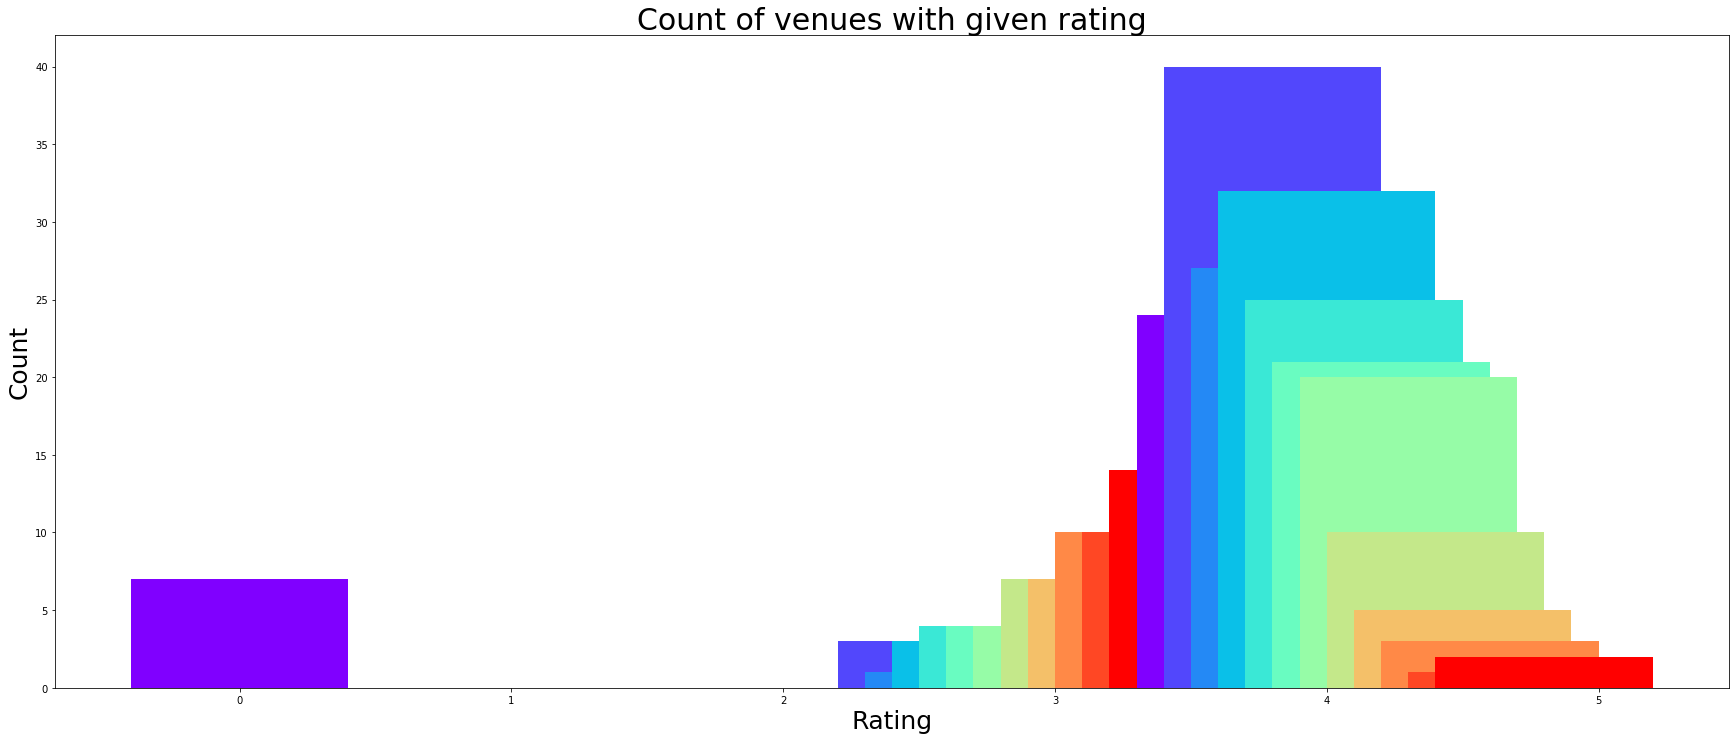

In [21]:
distribution_rating=jaipur_zom['rating'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(distribution_rating.index,distribution_rating.values,color=color)
plt.xlabel("Rating", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given rating", fontsize = 30)

From the above plots we can understand that the ratings of the restaurants are highly ranging from 2.5 to 5. About 15 restaurants has the rating '0'.Lets explore the subset of the dataset which has poor rating of 0.

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

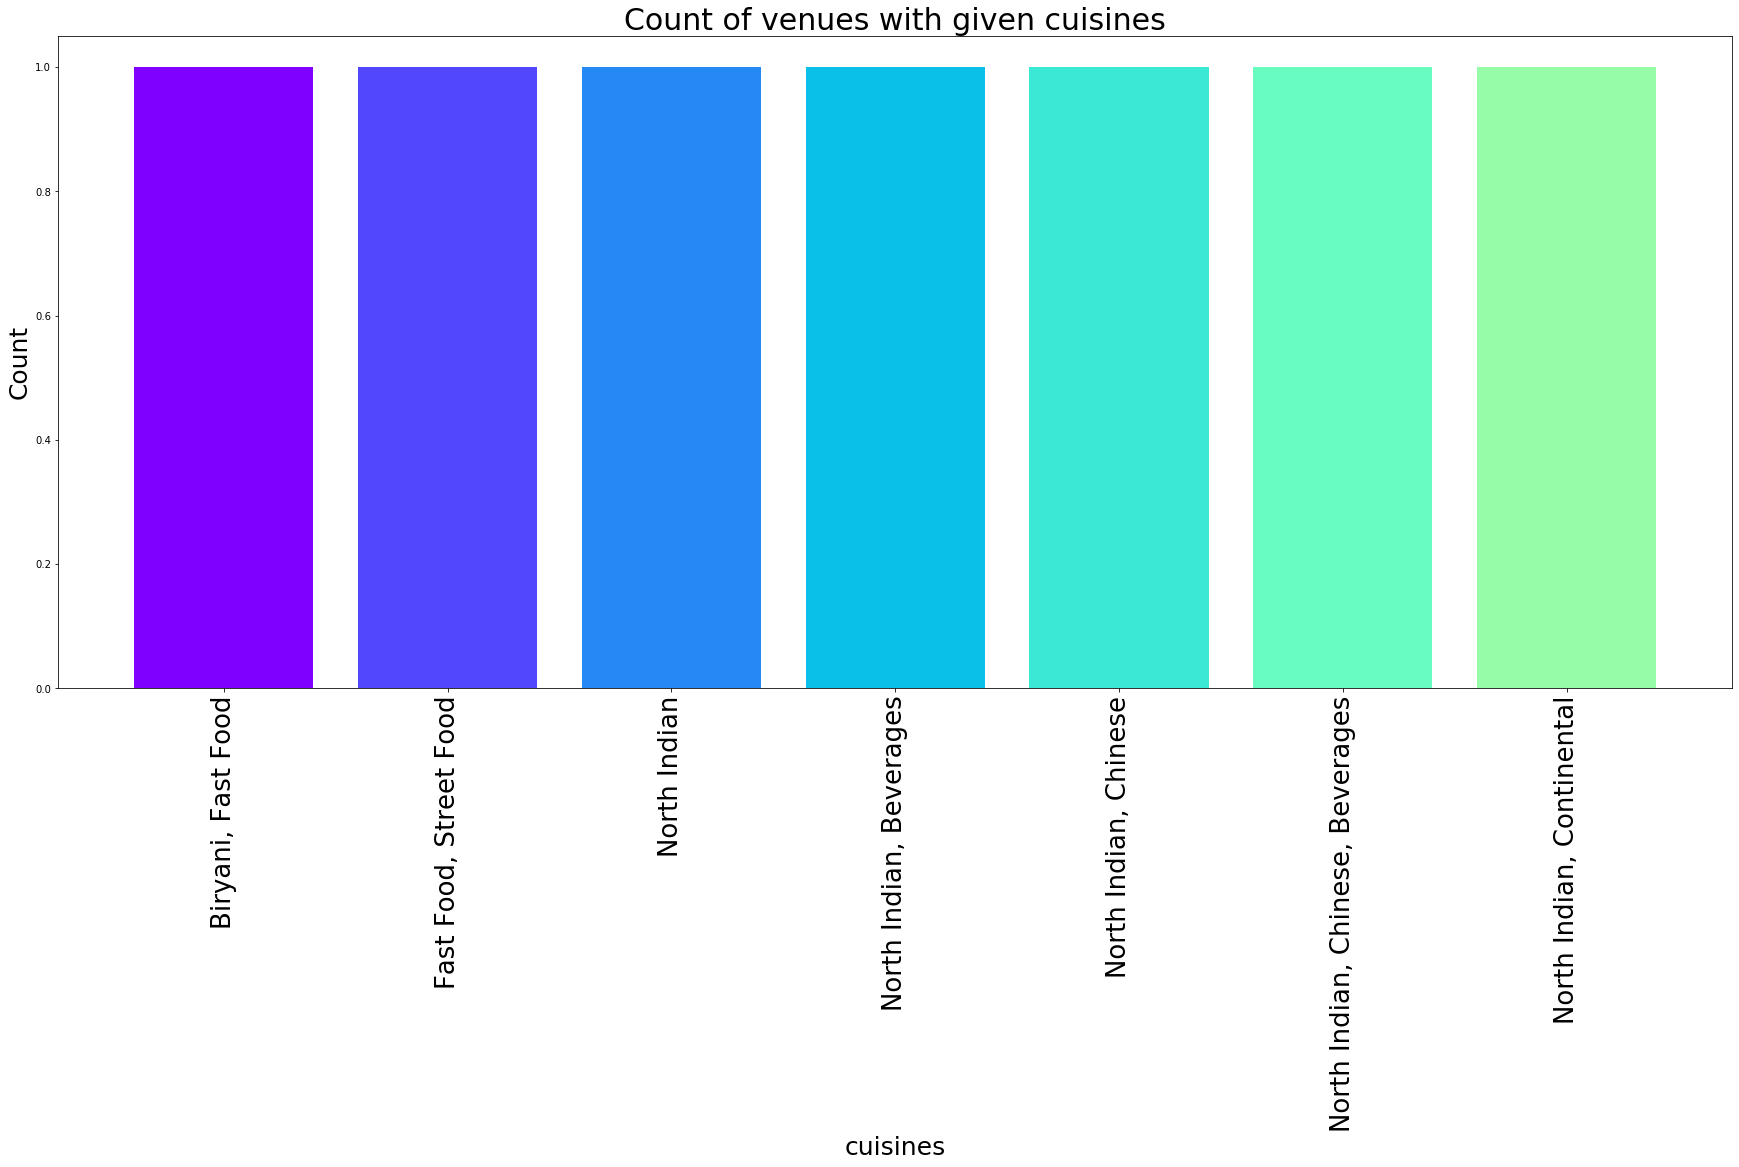

In [22]:
sub_jaipur=jaipur_zom[(jaipur_zom['rating']==0) & (jaipur_zom['distance']<=2000)]
sub_jaipur
cui=sub_jaipur['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=26)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)
plt.bar

Text(0.5, 1.0, 'Count of venues with given Price Range')

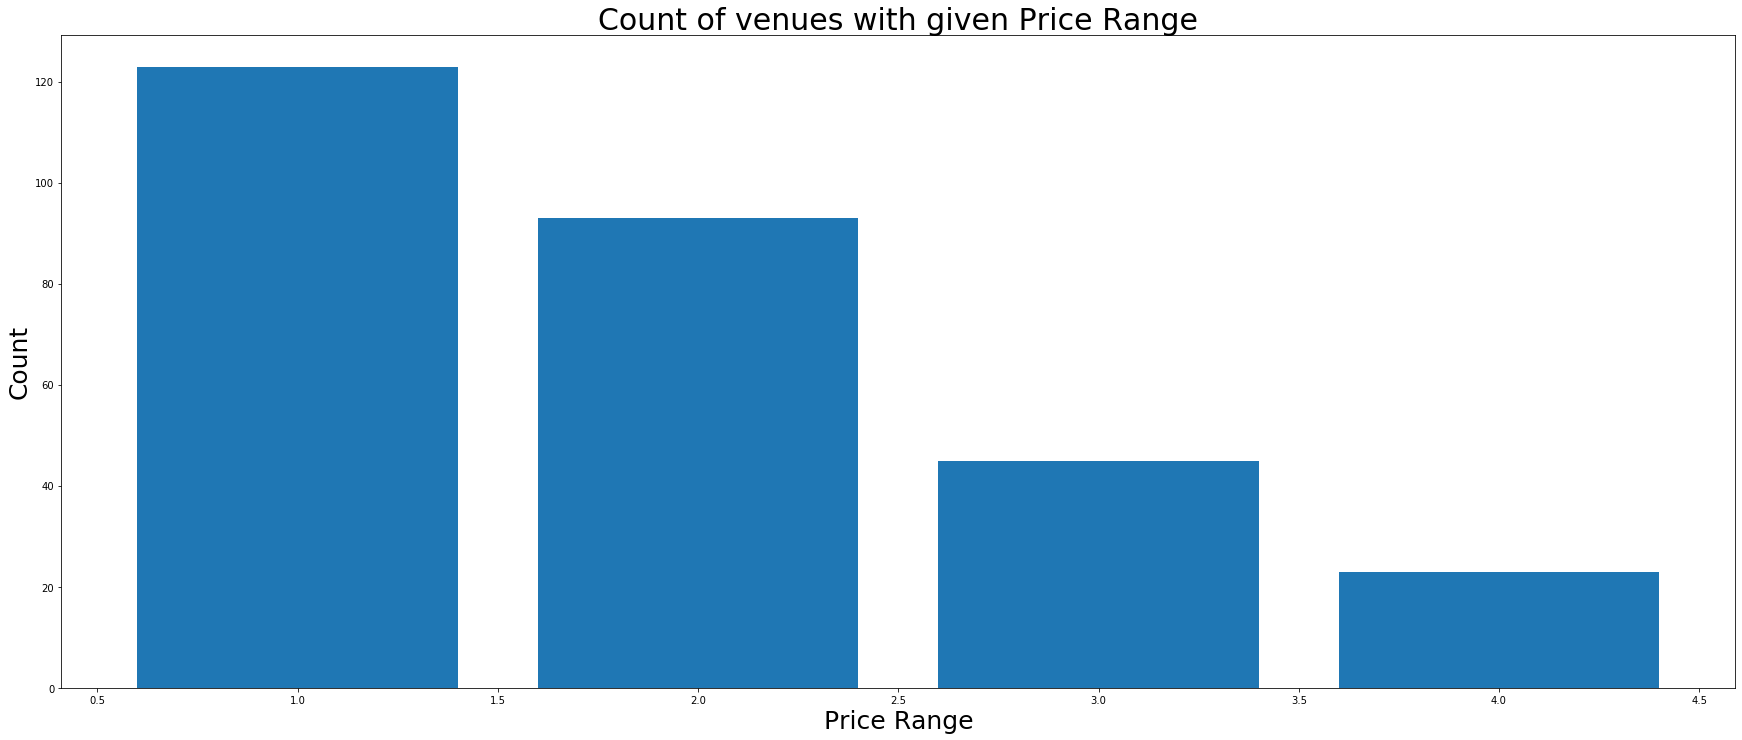

In [23]:
price_range=jaipur_zom['price_range'].value_counts().sort_index()
plt.figure(figsize = (30, 12))
plt.bar(price_range.index,price_range.values)

plt.xlabel("Price Range", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given Price Range", fontsize = 30)

From the above plot we can undestand that restaurants providing more or less same kind of cuisines have 0 rating.We can't assess which cuisine/category in particular has poor rating from the above plot.

Price range for the distribution is pocket friendly in the city of Jaipur. Zomato Price_range explains cost range from 1 to 4(1 being the pocket friendly to 4 being expensive)

Text(0.5, 1.0, 'Count of venues with given average price')

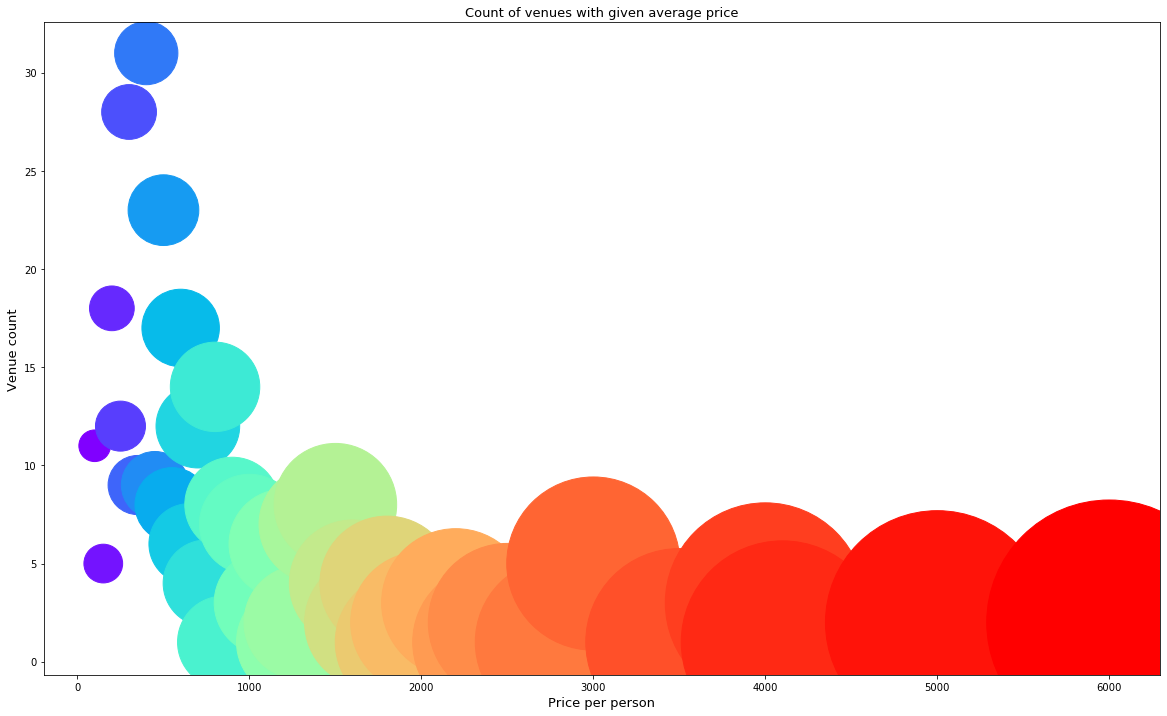

In [24]:
average_prices = jaipur_zom['price_for_two'].value_counts().sort_index()
plt.figure(figsize = (20, 12))
plt.scatter(average_prices.index, 
            average_prices.values, 
            s = average_prices.index*10, 
            c = cm.rainbow(np.linspace(0, 1, len(average_prices.index))))
plt.xlabel("Price per person", fontsize = 13)
plt.ylabel("Venue count", fontsize = 13)
plt.title("Count of venues with given average price", fontsize = 13)

In [25]:
final_ven=jaipur_zom[(jaipur_zom['distance']<=2000) &(jaipur_zom['rating']!=0) & (jaipur_zom['price_for_two']!=0)]
final_ven.shape

(277, 9)

In [26]:
final_ven=final_ven.drop(['venue','address','cuisines'],1)
final_ven.head()

latitude  longitude  price_for_two  price_range  rating  distance
0  26.891384  75.803603          800.0          2.0     4.6      2.84
1  26.891401  75.803677          800.0          2.0     4.4      2.84
2  26.841188  75.796064          800.0          2.0     4.4      7.94
3  26.915263  75.809704          700.0          2.0     3.6      2.25
4  26.911357  75.802407          450.0          1.0     3.8      1.51

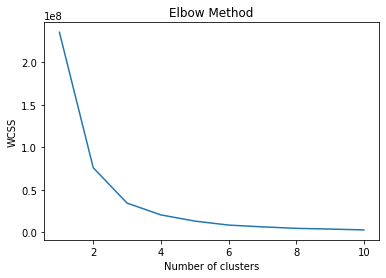

In [27]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, max_iter=300, n_init=10, random_state=0)
    kmeans.fit(final_ven)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [28]:
#cluster the areas based on the  various features of restaurants
from sklearn.cluster import KMeans

NO_OF_CLUSTERS = 4

clustering = final_ven
kMeans = KMeans(n_clusters = NO_OF_CLUSTERS, random_state = 0).fit(clustering)

In [29]:
kMeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 2, 2, 2, 2, 0, 3, 3, 1, 3, 1, 0,
       1, 0, 1, 1, 0, 0, 3, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       3, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 3, 3, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 3, 2, 2, 2, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0], dtype=int32)

In [30]:
clustered_df=jaipur_zom[(jaipur_zom['distance']<=2000) &(jaipur_zom['rating']!=0)& (jaipur_zom['price_for_two']!=0)]

In [31]:
clustered_df.insert(0, 'cluster_labels', kMeans.labels_)
clustered_df.head()

cluster_labels                                    venue   latitude  \
0               0                            Tapri Central  26.891384   
1               0                            Tapri Pratham  26.891401   
2               0                             Tapri Ashram  26.841188   
3               0  The Yellow House - The Robot Restaurant  26.915263   
4               0                            Tea Tradition  26.911357   

   longitude  price_for_two  price_range  rating  \
0  75.803603          800.0          2.0     4.6   
1  75.803677          800.0          2.0     4.4   
2  75.796064          800.0          2.0     4.4   
3  75.809704          700.0          2.0     3.6   
4  75.802407          450.0          1.0     3.8   

                                             address  \
0  B4 E, 3rd Floor, Surana Jewellers, Opposite Ce...   
1  43, Everest Colony, Near Punjab National Bank ...   
2  Shopping Arcade, Jaipur Marriott Hotel, Ashram...   
3  Silver Square Mall, Near Rajmandir Cinema, C S...   
4  D 29-A, Chandra Niwas, Subhash Marg, C Scheme,...   

                                  cuisines  distance  
0             Cafe, Fast Food, Street Food      2.84  
1  Cafe, Fast Food, Street Food, Beverages      2.84  
2  Cafe, Fast Food, Street Food, Beverages      7.94  
3  North Indian, Chinese, Italian, Mexican      2.25  
4                          Cafe, Fast Food      1.51

In [32]:
cluster_0=clustered_df[clustered_df['cluster_labels']==0]
print('Mean distance of a distance from central location of cluster 0: ',clustered_df[clustered_df['cluster_labels']==0]['distance'].mean())
print('Mean rating of cluster 0: ',clustered_df[clustered_df['cluster_labels']==0]['rating'].mean())
print('Mean price rate for an individual of cluster 0: ',(clustered_df[clustered_df['cluster_labels']==0]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 0 '.format(clustered_df[clustered_df['cluster_labels']==0]['rating'].shape[0]))
print('{} % of restaurants are in cluster 0 '.format(round((cluster_0.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 0:  3.719904306220096
Mean rating of cluster 0:  3.817224880382775
Mean price rate for an individual of cluster 0:  226.79425837320574
There are 209 restaurants in cluster 0 
75.45 % of restaurants are in cluster 0 


Text(0.5, 1.0, 'Count of venues with given cuisines')

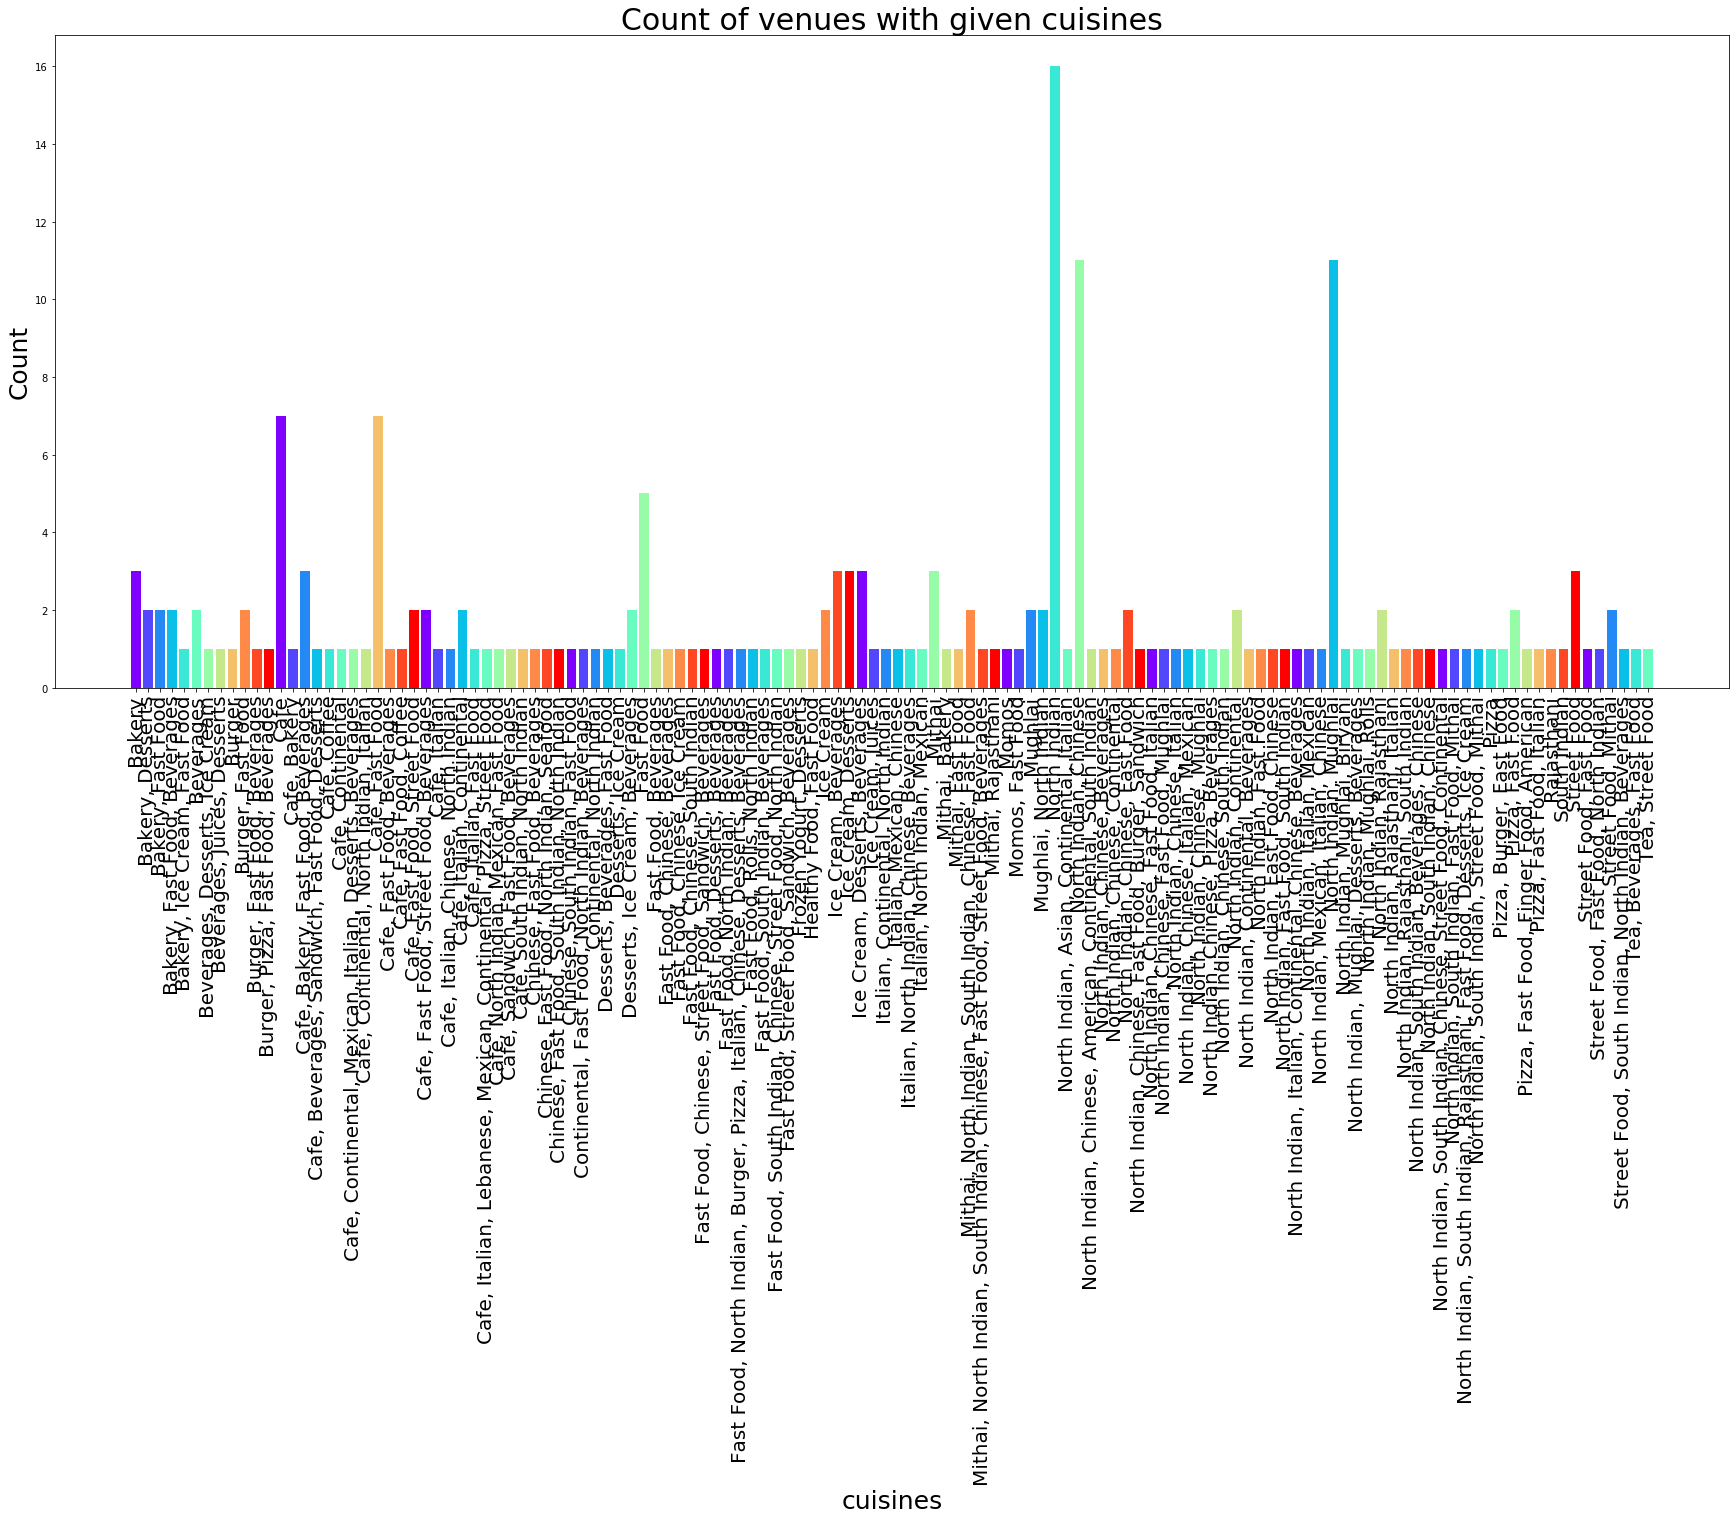

In [33]:
cui=cluster_0['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [34]:
cluster_1=clustered_df[clustered_df['cluster_labels']==1]
print('Mean distance of a distance from central location of cluster 1: ',clustered_df[clustered_df['cluster_labels']==1]['distance'].mean())
print('Mean rating of cluster 1: ',clustered_df[clustered_df['cluster_labels']==1]['rating'].mean())
print('Mean price rate for an individual of cluster 1: ',(clustered_df[clustered_df['cluster_labels']==1]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 1 '.format(clustered_df[clustered_df['cluster_labels']==1]['rating'].shape[0]))
print('{} % of restaurants are in cluster 1 '.format(round((cluster_1.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 1:  2.469787234042553
Mean rating of cluster 1:  3.8999999999999995
Mean price rate for an individual of cluster 1:  702.6595744680851
There are 47 restaurants in cluster 1 
16.97 % of restaurants are in cluster 1 


Text(0.5, 1.0, 'Count of venues with given cuisines')

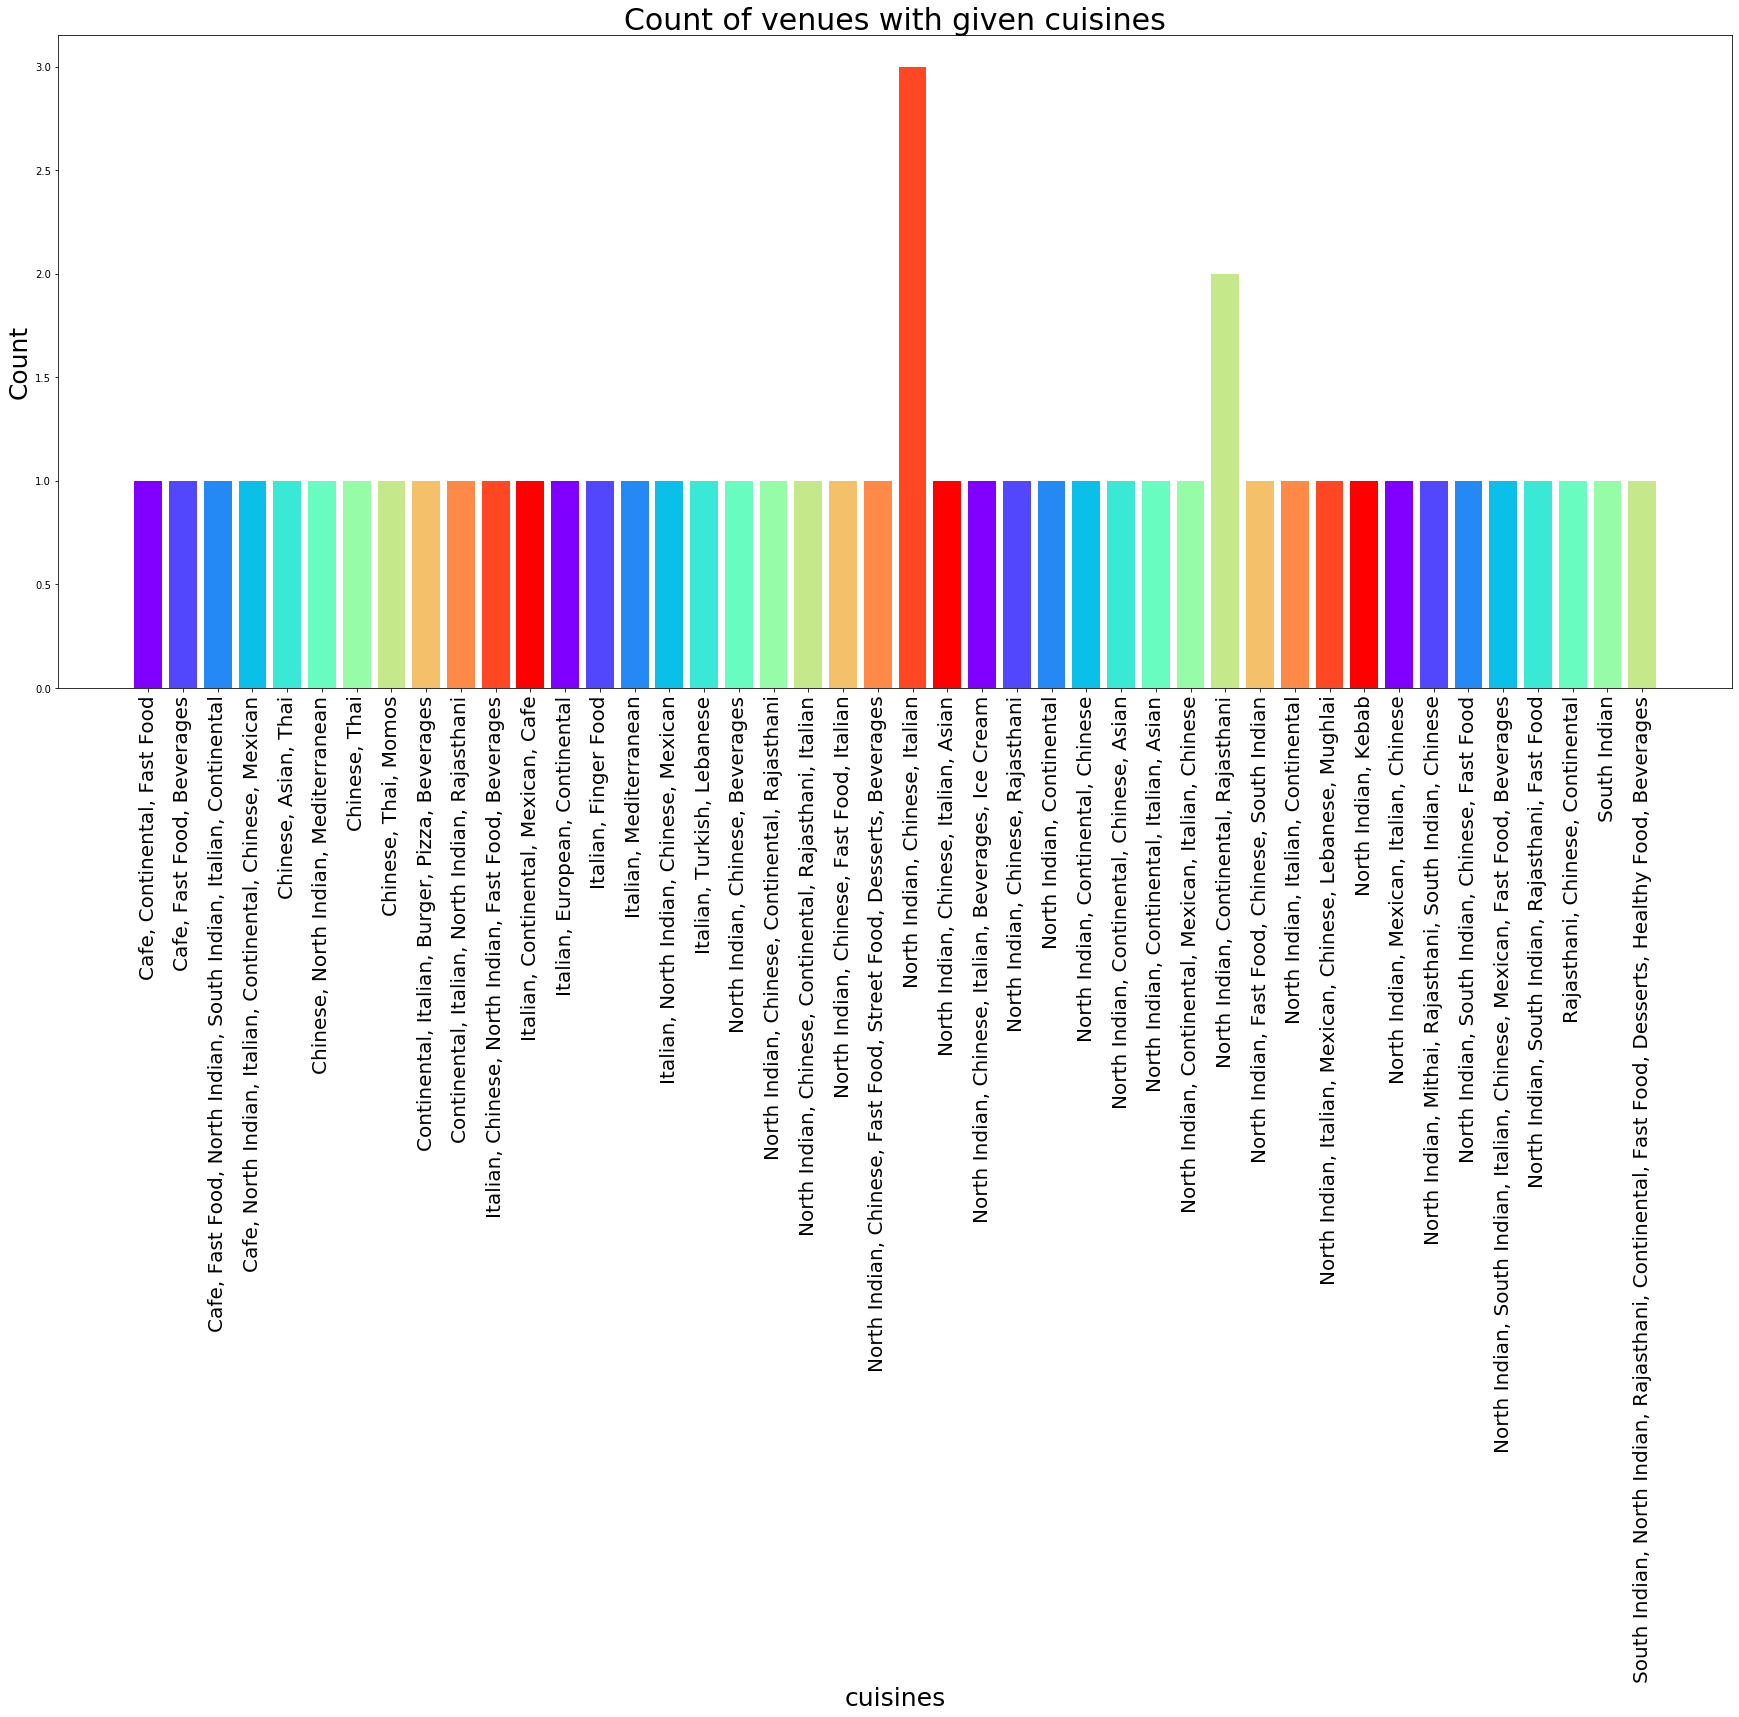

In [35]:
cui=cluster_1['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [36]:
cluster_1

cluster_labels                                              venue  \
7                 1                                       On The House   
9                 1                                       Corner House   
21                1                                     Thali and More   
29                1                             Laxmi Mishthan Bhandar   
48                1                       La Palma Cafe and Lounge Bar   
50                1              Jaipur Pavilion - ITC Rajputana Hotel   
52                1                              Sammy Singh's Rooftop   
54                1                                           Rangreza   
55                1                               Bartoss Bar & Lounge   
59                1                                Bar Palladio Jaipur   
68                1                                       Shikaar Bagh   
70                1                    Mohan Bagh - Hotel Narain Niwas   
73                1               The Dining Hall - Hotel Narain Niwas   
76                1                                      Gulabi Nagari   
89                1                                        Dasaprakash   
106               1               Kalyan Rooftop And Indoor Restaurant   
109               1                                       Social Vibes   
110               1                                            Retreat   
113               1                 Jaipur Darbar - The Rooftop Lounge   
114               1                                                LOL   
116               1                       Kloud - Royal Orchid Central   
117               1                               Revolving Restaurant   
118               1                                   Govindam Retreat   
120               1                                  Skyfall By Replay   
147               1                           Decked Up By Garden Cafe   
168               1                                      The TownHouse   
174               1                                    Masala Ministry   
175               1                                      The Eclectica   
201               1                                       Coffee Break   
213               1                              Home Café by Mr Beans   
214               1                                         Fat Lulu's   
216               1                             Surya Mahal Restaurant   
222               1                               OTB - On The Bar B-Q   
224               1                                    Barbeque Nation   
230               1                                       Ten Twisters   
243               1                              Caffe Palladio Jaipur   
264               1                              Jaipur Modern Kitchen   
268               1  Monarch Restaurant - Holiday Inn Jaipur City C...   
269               1  Chao Chinese Bistro - Holiday Inn Jaipur City ...   
272               1                                      Jaipur Jungle   
335               1                           Kebabs & Curries Company   
416               1                          Bazaar - Zone by the Park   
420               1                           Playa - Zone By The Park   
427               1                                             Inchin   
431               1           Republic of Noodles - Lemon Tree Premier   
454               1                 Surabhi Restaurant & Turban Museum   
475               1                    Around The World - Ramada Hotel   

      latitude  longitude  price_for_two  price_range  rating  \
7    26.905337  75.794570         1500.0          3.0     4.4   
9    26.907390  75.795520         1200.0          3.0     4.0   
21   26.910818  75.805427         1100.0          3.0     4.5   
29   26.896717  75.815396         1000.0          3.0     3.3   
48   26.914026  75.804732         1400.0          3.0     3.9   
50   26.918846  75.791836         1800.0          3.0     4.1 

In [37]:
cluster_2=clustered_df[clustered_df['cluster_labels']==2]
print('Mean distance of a distance from central location of cluster 2: ',clustered_df[clustered_df['cluster_labels']==2]['distance'].mean())
print('Mean rating of cluster 2: ',clustered_df[clustered_df['cluster_labels']==2]['rating'].mean())
print('Mean price rate for an individual of cluster 2: ',(clustered_df[clustered_df['cluster_labels']==2]['price_for_two']/2).mean())
print('There are {} restaurants in cluster 2 '.format(clustered_df[clustered_df['cluster_labels']==2]['rating'].shape[0]))
print('{} % of restaurants are in cluster 2 '.format(round((cluster_2.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 2:  3.5512499999999996
Mean rating of cluster 2:  3.875
Mean price rate for an individual of cluster 2:  2381.25
There are 8 restaurants in cluster 2 
2.89 % of restaurants are in cluster 2 


Text(0.5, 1.0, 'Count of venues with given cuisines')

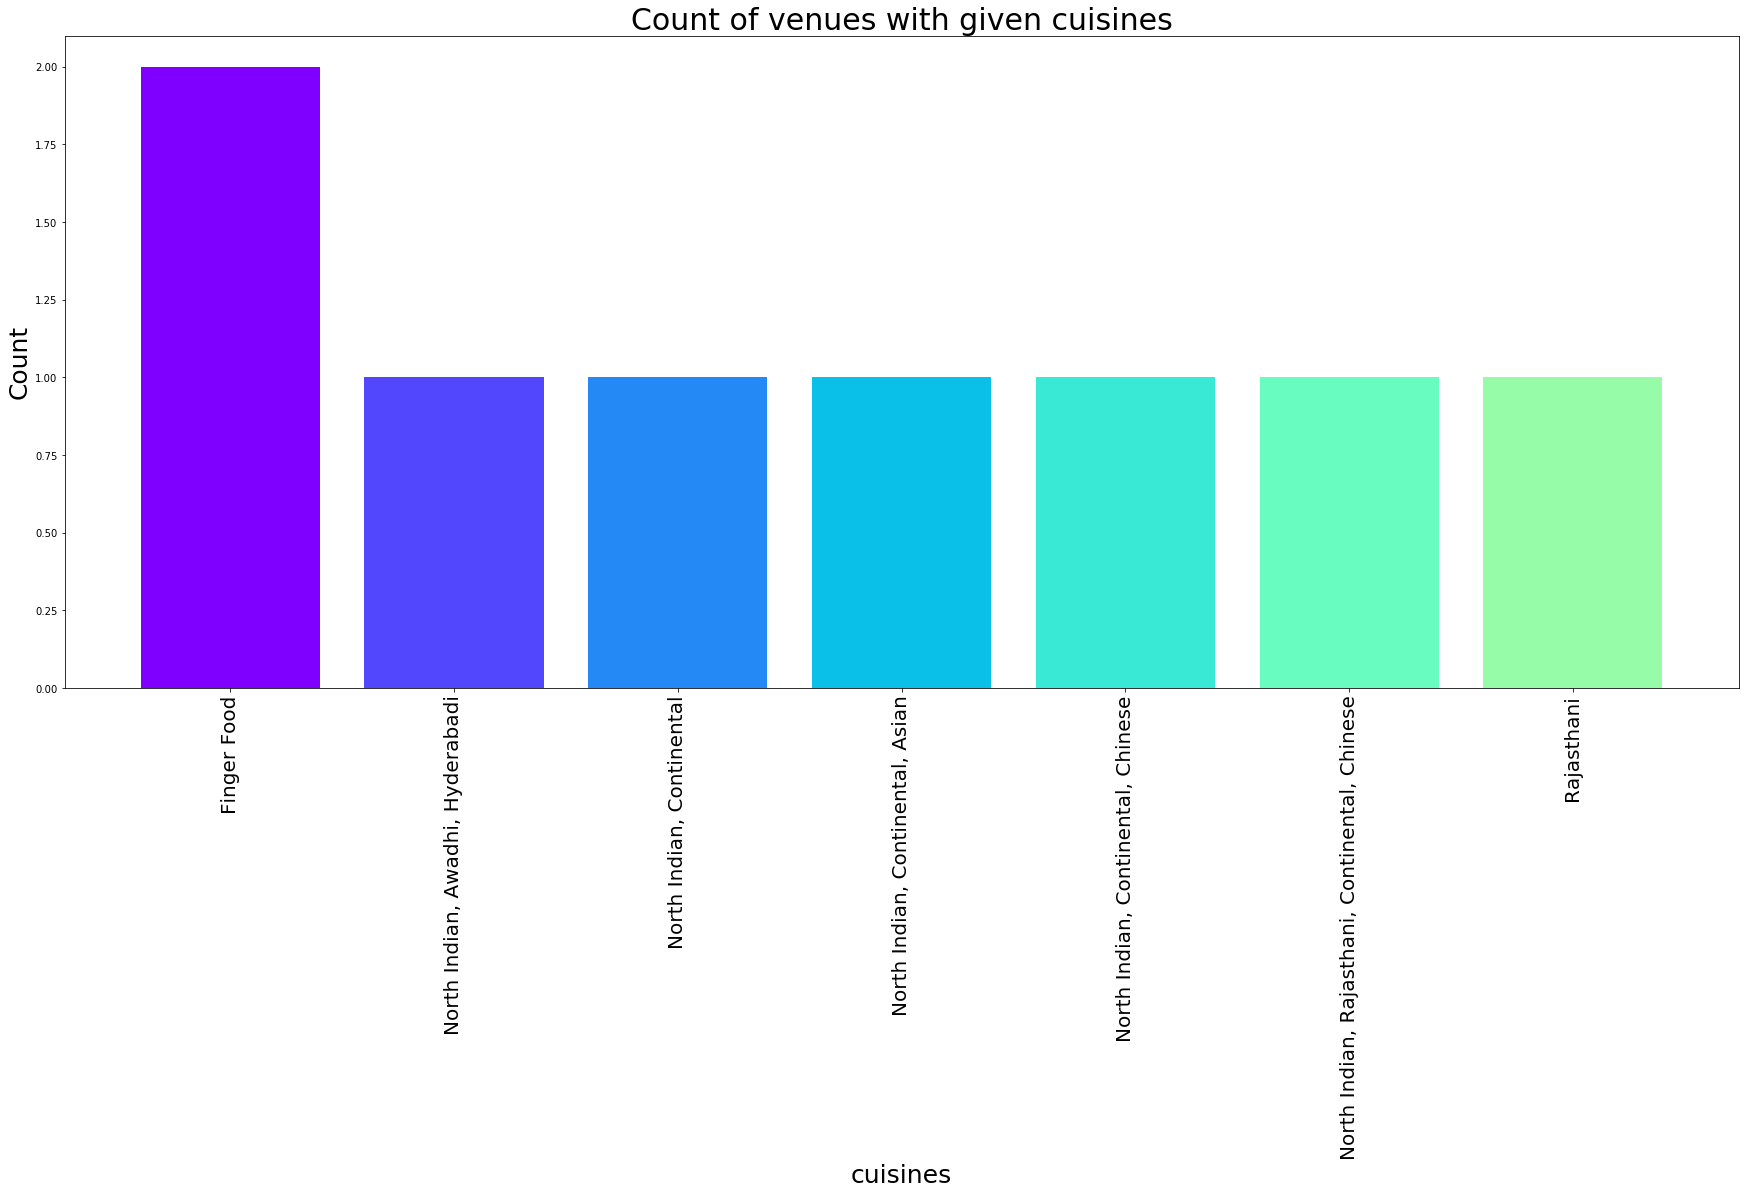

In [38]:
cui=cluster_2['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [39]:
cluster_2

cluster_labels                                        venue   latitude  \
41                2               Suvarna Mahal - Rambagh Palace  26.898109   
42                2             The Rajput Room - Rambagh Palace  26.898109   
43                2                The Verandah - Rambagh Palace  26.898109   
44                2                The Polo Bar - Rambagh Palace  26.898109   
365               2      Sheesh Mahal Bar -  ITC Rajputana Hotel  26.918842   
368               2     Sheesh Mahal-Virasat Heritage Restaurant  26.899535   
369               2                Swapna Mahal - The Raj Palace  26.935661   
370               2  Surya Mahal Courtyard - The Oberoi Rajvilas  26.876279   

     longitude  price_for_two  price_range  rating  \
41   75.808150         5000.0          4.0     4.3   
42   75.808150         4000.0          4.0     4.2   
43   75.808150         4000.0          4.0     4.1   
44   75.808150         4100.0          4.0     4.0   
365  75.791834         4000.0          4.0     3.8   
368  75.793017         6000.0          4.0     2.9   
369  75.834233         6000.0          4.0     3.8   
370  75.882480         5000.0          4.0     3.9   

                                               address  \
41   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
42   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
43   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
44   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
365  ITC Rajputana Hotel, Palace Road, Gopalbari, J...   
368  Virasat Heritage Restaurant, Plot B, Sahkar Ma...   
369  The Raj Palace, Jorawar Singh Gate, Amer Road,...   
370  The Oberoi Rajvilas, Goner Road, Near Agra Roa...   

                                           cuisines  distance  
41                 North Indian, Awadhi, Hyderabadi      2.61  
42                 North Indian, Continental, Asian      2.61  
43                        North Indian, Continental      2.61  
44                                      Finger Food      2.61  
365                                     Finger Food      0.84  
368                                      Rajasthani      1.53  
369  North Indian, Rajasthani, Continental, Chinese      5.33  
370              North Indian, Continental, Chinese     10.27

In [40]:
cluster_3=clustered_df[clustered_df['cluster_labels']==3]
print('Mean distance of a distance from central location of cluster 3 ',clustered_df[clustered_df['cluster_labels']==3]['distance'].mean())
print('Mean rating of cluster 3: ',clustered_df[clustered_df['cluster_labels']==3]['rating'].mean())
print('Mean price rate for an individual of cluster 3: ',(clustered_df[clustered_df['cluster_labels']==3]['price_for_two']/2).mean())
print('There are {} restaurants in cluster  '.format(clustered_df[clustered_df['cluster_labels']==3]['rating'].shape[0]))
print('{} % of restaurants are in cluster 3 '.format(round((cluster_3.shape[0]/clustered_df.shape[0])*100,2)))

Mean distance of a distance from central location of cluster 3  3.368461538461539
Mean rating of cluster 3:  4.084615384615383
Mean price rate for an individual of cluster 3:  1357.6923076923076
There are 13 restaurants in cluster  
4.69 % of restaurants are in cluster 3 


Text(0.5, 1.0, 'Count of venues with given cuisines')

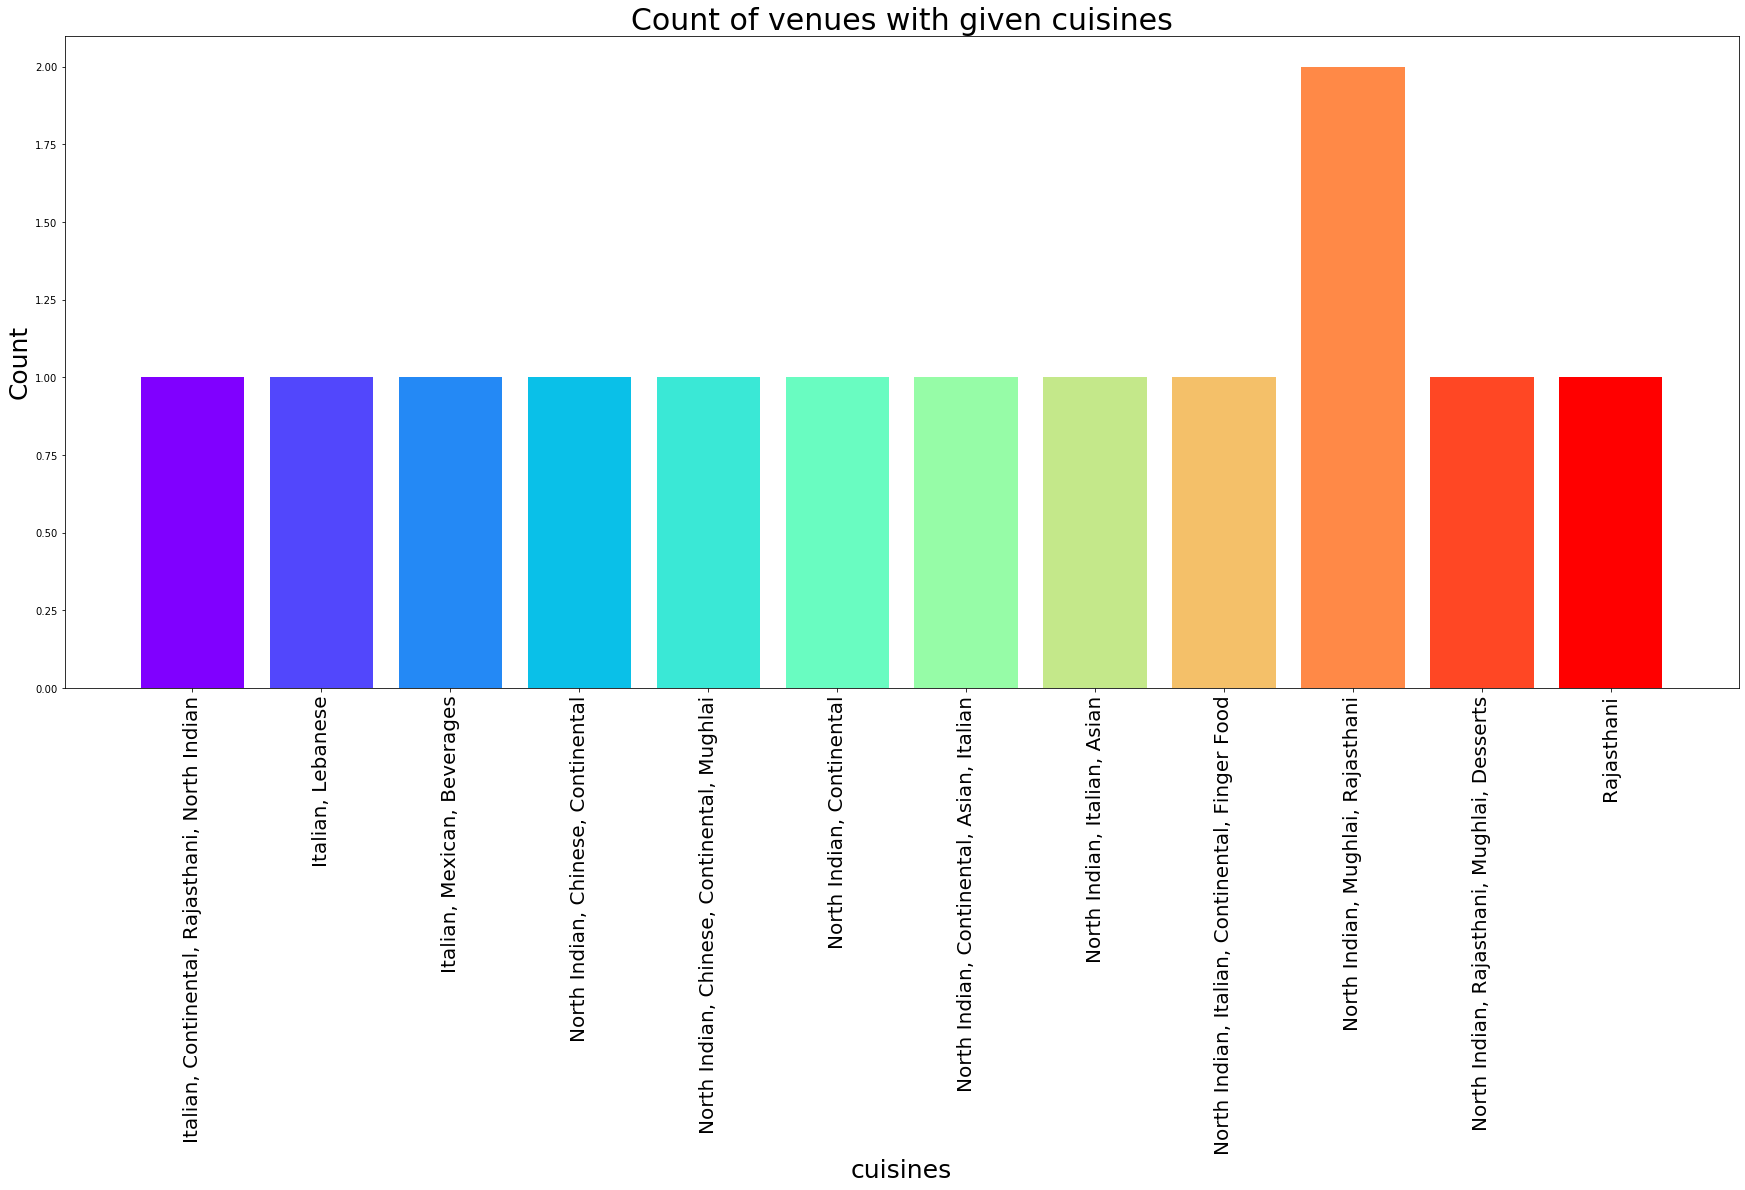

In [41]:
cui=cluster_3['cuisines'].value_counts().sort_index()
color=cm.rainbow((np.linspace(0,1,12)))
plt.figure(figsize = (30, 12))
plt.bar(cui.index,cui.values,color=color)
plt.xticks(rotation='vertical',fontsize=20)
plt.xlabel("cuisines", fontsize = 25)
plt.ylabel("Count", fontsize = 25)
plt.title("Count of venues with given cuisines", fontsize = 30)

In [42]:
cluster_3

cluster_labels                                    venue   latitude  \
40                3                   Steam - Rambagh Palace  26.898109   
46                3           Peshawri - ITC Rajputana Hotel  26.918853   
47                3          Jal Mahal - ITC Rajputana Hotel  26.918855   
49                3                  Blackout Club & Terrace  26.914006   
58                3                   Baradari - City Palace  26.926636   
151               3                                  1135 AD  26.986758   
166               3                             Little Italy  26.910798   
215               3                                    Niros  26.916332   
273               3                  Chaandi - Hilton Jaipur  26.901296   
274               3                    Aurum - Hilton Jaipur  26.901297   
280               3                Jal Mahal- Trident Jaipur  26.956786   
282               3        24/7 Restaurant- The LaLiT Jaipur  26.840935   
366               3  Swarn Mahal-Virasat Heritage Restaurant  26.899544   

     longitude  price_for_two  price_range  rating  \
40   75.808150         2800.0          4.0     4.8   
46   75.791835         3000.0          4.0     4.6   
47   75.791823         3500.0          4.0     4.2   
49   75.805721         2200.0          4.0     4.2   
58   75.824898         2200.0          4.0     3.9   
151  75.850630         2500.0          4.0     4.1   
166  75.798409         2400.0          4.0     4.2   
215  75.811452         2200.0          4.0     4.1   
273  75.783818         3000.0          4.0     4.3   
274  75.783793         3000.0          4.0     3.8   
280  75.843221         2500.0          4.0     3.9   
282  75.807506         3000.0          4.0     4.0   
366  75.793017         3000.0          4.0     3.0   

                                               address  \
40   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
46   ITC Rajputana Hotel, Palace Road, Gopalbari, J...   
47   ITC Rajputana Hotel, Palace Road, Gopalbari, J...   
49   Hotel Golden Oak, 9th Floor, Ahinsa Circle, La...   
58   The City Palace, Gate 2, Jaleb Chowk, Pink Cit...   
151  Level 2, Jaleb Chowk, Near Sheela Mata Temple,...   
166                  C 11, KK Square, C Scheme, Jaipur   
215                  319, Panch Batti, MI Road, Jaipur   
273  Hilton Jaipur, 42, Geejgarh House, Hawa Sadak,...   
274  Hilton Jaipur, 42, Geejgarh House, Hawa Sadak,...   
280  Trident Jaipur, Opposite Jal Mahal, Amer Road,...   
282  The LaLiT Jaipur, Jagatpura Road, Malviya Naga...   
366  Virasat Heritage Restaurant, Plot B, Sahkar Ma...   

                                            cuisines  distance  
40                                 Italian, Lebanese      2.61  
46       North Indian, Rajasthani, Mughlai, Desserts      0.85  
47                North Indian, Chinese, Continental      0.84  
49   North Indian, Italian, Continental, Finger Food      1.84  
58    Italian, Continental, Rajasthani, North Indian      4.05  
151                North Indian, Mughlai, Rajasthani     10.36  
166                      Italian, Mexican, Beverages      1.12  
215      North Indian, Chinese, Continental, Mughlai      2.44  
273                North Indian, Mughlai, Rajasthani      1.28  
274                     North Indian, Italian, Asian      1.28  
280                        North Indian, Continental      7.42  
282        North Indian, Continental, Asian, Italian      8.17  
366                                       Rajasthani      1.53

In [43]:
cluster_0=clustered_df[clustered_df['cluster_labels']==0]
cluster_0.head()

cluster_labels                                    venue   latitude  \
0               0                            Tapri Central  26.891384   
1               0                            Tapri Pratham  26.891401   
2               0                             Tapri Ashram  26.841188   
3               0  The Yellow House - The Robot Restaurant  26.915263   
4               0                            Tea Tradition  26.911357   

   longitude  price_for_two  price_range  rating  \
0  75.803603          800.0          2.0     4.6   
1  75.803677          800.0          2.0     4.4   
2  75.796064          800.0          2.0     4.4   
3  75.809704          700.0          2.0     3.6   
4  75.802407          450.0          1.0     3.8   

                                             address  \
0  B4 E, 3rd Floor, Surana Jewellers, Opposite Ce...   
1  43, Everest Colony, Near Punjab National Bank ...   
2  Shopping Arcade, Jaipur Marriott Hotel, Ashram...   
3  Silver Square Mall, Near Rajmandir Cinema, C S...   
4  D 29-A, Chandra Niwas, Subhash Marg, C Scheme,...   

                                  cuisines  distance  
0             Cafe, Fast Food, Street Food      2.84  
1  Cafe, Fast Food, Street Food, Beverages      2.84  
2  Cafe, Fast Food, Street Food, Beverages      7.94  
3  North Indian, Chinese, Italian, Mexican      2.25  
4                          Cafe, Fast Food      1.51

In [44]:
for lat,long,name,distance,rating in zip(cluster_0['latitude'],cluster_0['longitude'],cluster_0['venue'],cluster_0['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3144aa',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map)
jaipur_map

In [45]:
cluster_1=clustered_df[clustered_df['cluster_labels']==1]
cluster_1.head()

cluster_labels                         venue   latitude  longitude  \
7                1                  On The House  26.905337  75.794570   
9                1                  Corner House  26.907390  75.795520   
21               1                Thali and More  26.910818  75.805427   
29               1        Laxmi Mishthan Bhandar  26.896717  75.815396   
48               1  La Palma Cafe and Lounge Bar  26.914026  75.804732   

    price_for_two  price_range  rating  \
7          1500.0          3.0     4.4   
9          1200.0          3.0     4.0   
21         1100.0          3.0     4.5   
29         1000.0          3.0     3.3   
48         1400.0          3.0     3.9   

                                              address  \
7   E 145, Ramesh Marg, Behind Talwalkars, C Schem...   
9      F 31, Azad Marg, Ashok Nagar, C Scheme, Jaipur   
21  C-46 B, Sarojini Marg, Above Punjab National B...   
29  A/65, JLN Marg, Near Soni Hospital, Raja Park,...   
48  The Hotel Garden View, Subhash Marg, Near Ahin...   

                                             cuisines  distance  
7                 Italian, Continental, Mexican, Cafe      1.06  
9   North Indian, Chinese, Italian, Beverages, Ice...      0.99  
21     North Indian, South Indian, Chinese, Fast Food      1.81  
29  North Indian, Mithai, Rajasthani, South Indian...      3.29  
48                     Italian, European, Continental      1.74

In [46]:
for lat,long,name,distance,rating in zip(cluster_1['latitude'],cluster_1['longitude'],cluster_1['venue'],cluster_1['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='green',
        fill=True,
        fill_color='#3144aa',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map)
jaipur_map

In [47]:
cluster_2=clustered_df[clustered_df['cluster_labels']==2]
cluster_2.head()

cluster_labels                                    venue   latitude  \
41                2           Suvarna Mahal - Rambagh Palace  26.898109   
42                2         The Rajput Room - Rambagh Palace  26.898109   
43                2            The Verandah - Rambagh Palace  26.898109   
44                2            The Polo Bar - Rambagh Palace  26.898109   
365               2  Sheesh Mahal Bar -  ITC Rajputana Hotel  26.918842   

     longitude  price_for_two  price_range  rating  \
41   75.808150         5000.0          4.0     4.3   
42   75.808150         4000.0          4.0     4.2   
43   75.808150         4000.0          4.0     4.1   
44   75.808150         4100.0          4.0     4.0   
365  75.791834         4000.0          4.0     3.8   

                                               address  \
41   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
42   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
43   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
44   Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
365  ITC Rajputana Hotel, Palace Road, Gopalbari, J...   

                             cuisines  distance  
41   North Indian, Awadhi, Hyderabadi      2.61  
42   North Indian, Continental, Asian      2.61  
43          North Indian, Continental      2.61  
44                        Finger Food      2.61  
365                       Finger Food      0.84

In [48]:
for lat,long,name,distance,rating in zip(cluster_2['latitude'],cluster_2['longitude'],cluster_2['venue'],cluster_2['distance'],cluster_0['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='black',
        fill=True,
        fill_color='#8186aa',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map)
jaipur_map

In [49]:
cluster_3=clustered_df[clustered_df['cluster_labels']==3]
cluster_3.head()

cluster_labels                            venue   latitude  longitude  \
40               3           Steam - Rambagh Palace  26.898109  75.808150   
46               3   Peshawri - ITC Rajputana Hotel  26.918853  75.791835   
47               3  Jal Mahal - ITC Rajputana Hotel  26.918855  75.791823   
49               3          Blackout Club & Terrace  26.914006  75.805721   
58               3           Baradari - City Palace  26.926636  75.824898   

    price_for_two  price_range  rating  \
40         2800.0          4.0     4.8   
46         3000.0          4.0     4.6   
47         3500.0          4.0     4.2   
49         2200.0          4.0     4.2   
58         2200.0          4.0     3.9   

                                              address  \
40  Rambagh Palace, Bhawani Singh Road, C Scheme, ...   
46  ITC Rajputana Hotel, Palace Road, Gopalbari, J...   
47  ITC Rajputana Hotel, Palace Road, Gopalbari, J...   
49  Hotel Golden Oak, 9th Floor, Ahinsa Circle, La...   
58  The City Palace, Gate 2, Jaleb Chowk, Pink Cit...   

                                           cuisines  distance  
40                                Italian, Lebanese      2.61  
46      North Indian, Rajasthani, Mughlai, Desserts      0.85  
47               North Indian, Chinese, Continental      0.84  
49  North Indian, Italian, Continental, Finger Food      1.84  
58   Italian, Continental, Rajasthani, North Indian      4.05

In [50]:
for lat,long,name,distance,rating in zip(cluster_3['latitude'],cluster_3['longitude'],cluster_3['venue'],cluster_3['distance'],cluster_3['rating']):
    label = '{} , \n distance from the center {} km ,rating: {}'.format(name,distance,rating)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
     [lat, long],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3468aa',
        fill_opacity=0.7,
        parse_html=True).add_to(jaipur_map)
jaipur_map

### Results and Discussion

Based on the analysis we can draw many conclusions.We have profiled the clusters based on the price_Range,rating,average price for two and distance from the center.

## From cluster 0 

- Mean distance of a distance from central location of cluster 0:  3.719904306220096
- Mean rating of cluster 0:  3.817224880382775
- Mean price rate for an individual of cluster 0:  226.79425837320574
- There are 209 restaurants in cluster 0 
- 75.45 % of restaurants are in cluster 0 

## From cluster 1, 

- Mean distance of a distance from central location of cluster 1:  2.469787234042553
- Mean rating of cluster 1:  3.8999999999999995
- Mean price rate for an individual of cluster 1:  702.6595744680851
- There are 47 restaurants in cluster 1 
- 16.97 % of restaurants are in cluster 1 


## From cluster 2, 

- Mean distance of a distance from central location of cluster 2:  3.5512499999999996
- Mean rating of cluster 2:  3.875
- Mean price rate for an individual of cluster 2:  2381.25
- There are 8 restaurants in cluster 2 
- 2.89 % of restaurants are in cluster 2 

## From cluster 3, 

- Mean distance of a distance from central location of cluster 3  3.368461538461539
- Mean rating of cluster 3:  4.084615384615383
- Mean price rate for an individual of cluster 3:  1357.6923076923076
- There are 13 restaurants in cluster  
- 4.69 % of restaurants are in cluster 3 

As per analysis , we can suggest that cluster 0 and cluster 1  is  budgeted restaurants for medium class with rating ranging  to 4, which can be considered for dinning  for tourists and for any person want to visit restaurants in Jaipur. Also for any business person looking to open restaurants in this location. It can be suggested as good option.

Cluster 3 is little expensive compare to cluster 0 and 1 with same rating coming as 4.

Cluster 2 is very expensive  with rating 3.8.

On the basis of data analysis for restaurants in Jaipur ,anyone can use this information to build up an on line website/mobile application, to provide users with up to date information about various venues in the city based on the search criteria (name, rating and price).

### Conclusion

The purpose of this project was to explore the places that a person visiting Jaipur  could visit. The venues have been identified using Foursquare and Zomato  API and have been plotted on the map